# DEEP CONVOLUTIONAL GENERATIVE ADVERSARIAL NETWORKS

당시 지도학습 방식의 CNN이 computer vision applications에 범용적으로 적용되어오고 있었는데 비지도학습 방식의 CNN은 많이 주목 받지 못함  

비지도학습 방식의 모델 DCGAN 구조를 제시, 다양한 데이터셋에서 모델이 object level 에서 scene level 까지 representation의 계층적인 구조를 학습하는 것을 보임  

논문의 주된 contribution은 아래와 같음  

1. 안정적 훈련을 가능케하는 convolutional GAN의 구조, 제약을 제시 & 평가
2. 학습된 discriminator를 이용하여 image classification task 수행
3. GAN의 학습되는 필터 시각화
4. generator의 vector arithmetic 성질을 보임

## 모델 구조

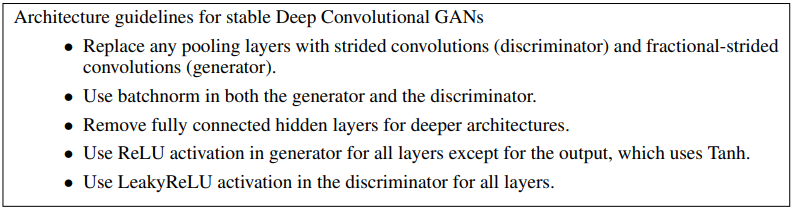

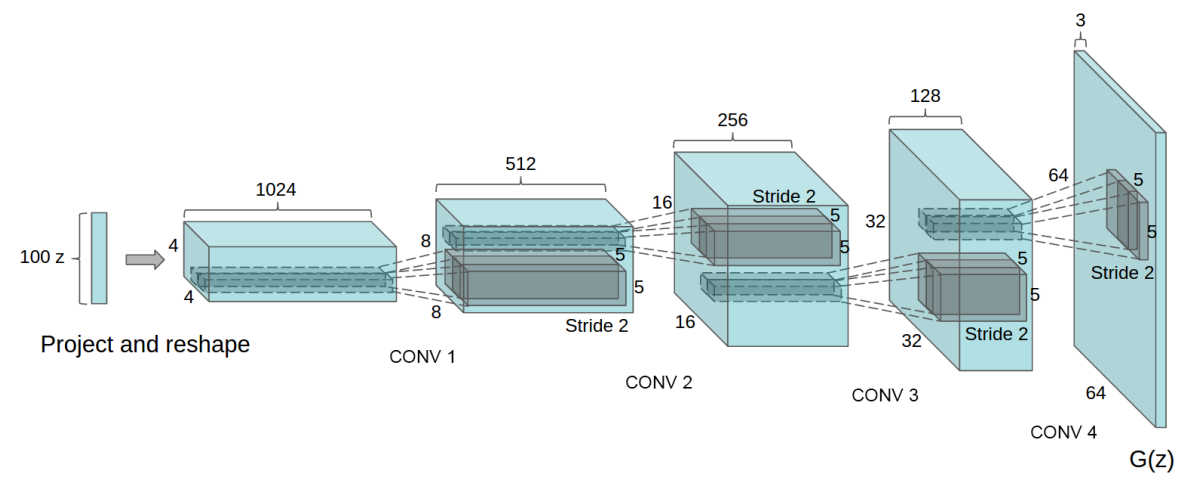

## 생성자 성능

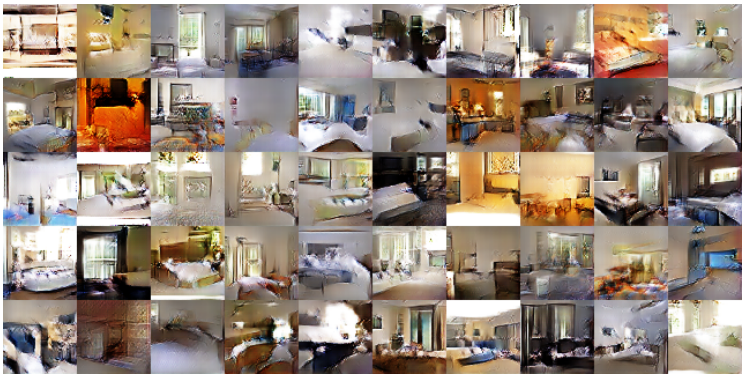

LSUN 데이터셋으로 1 에폭 학습시킨 생성자로부터 만들어진 이미지

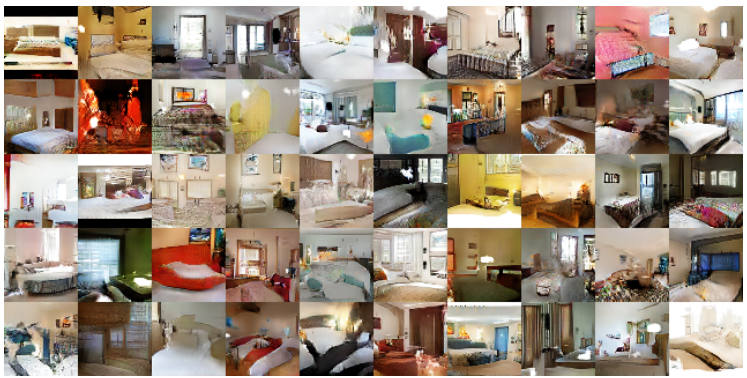

LSUN 데이터셋으로 5 에폭 학습시킨 생성자로부터 만들어진 이미지

## 표현학습

DCGAN에 의해 학습된 representation의 품질을 평가하기 위해 이미지넷 1k 데이터셋에 pretrain 시킨뒤 SVM을 붙여 CIFAR-10 데이터셋으로 분류를 수행한 결과

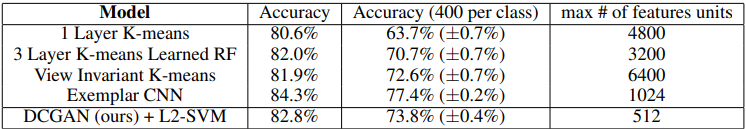

동일한 구조를 사용하여 SVHN 데이터셋에 지도학습방식으로 훈련시켰던 연구와는 결과가 다름 즉 모델 구조때문에 좋은 성능이 나온 것이 아님

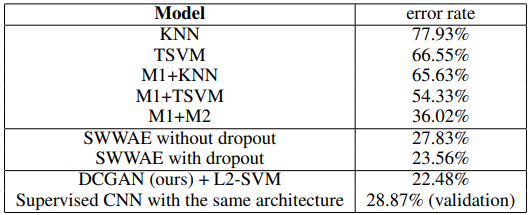

## Walking in the latent space

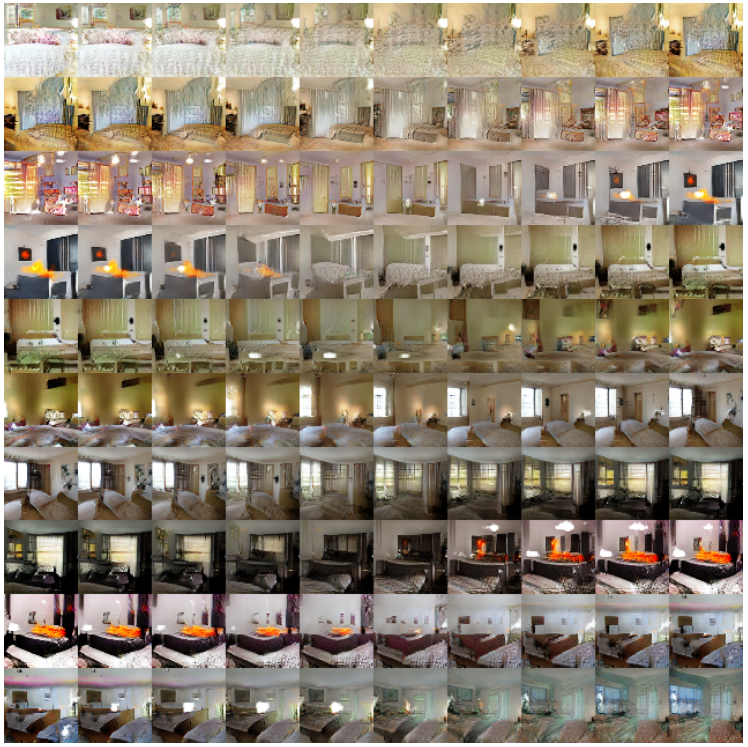

input인 z의 값을 조금씩 바꿔가면서 생성된 이미지들이 부드럽게 변화하는 모습을 확인 할수 있음  
특히 벽이 창문으로 바뀌는등 의미론적인 변화가 발생하는 것으로 보아 모델이 적절하게 representation을 학습한 것을 알 수 있음

## 필터 시각화

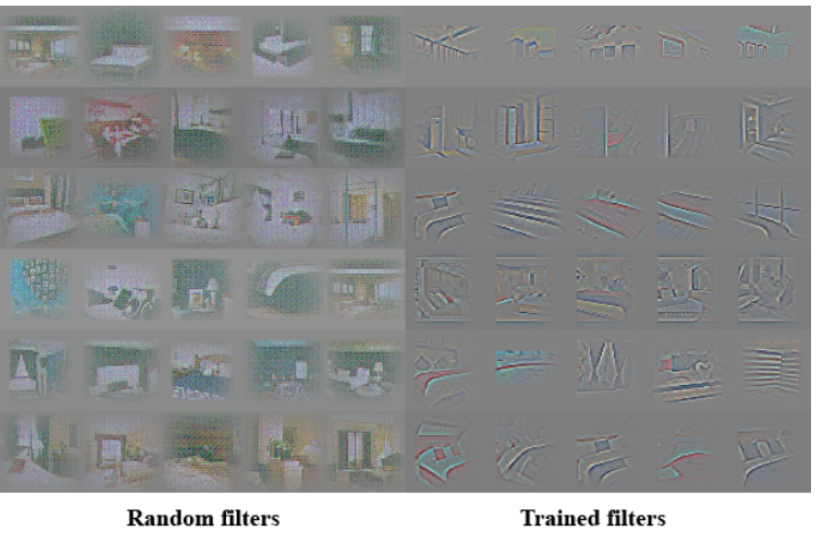

왼쪽은 학습전 무작위 값을 가지고 있는 필터  

오른쪽은 discriminator가 가구나 창문에 맞게 필터를 잘 학습시킴

## Manipulating the generator representation

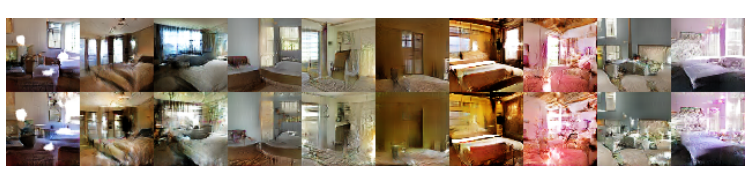

각 특징에 대한 필터를 dropout 시켜 이미지를 생성한 모습  
아래의 이미지는 창문에 대한 필터를 dropout 시켜 생성된 이미지로 창문대신 문이나 거울같은 가구로 대체되는 것을 볼 수 있음  
즉 창문에 관한 representation을 잘 학습했다는것을 알 수 있음 

## Vector arithmetic on face samples

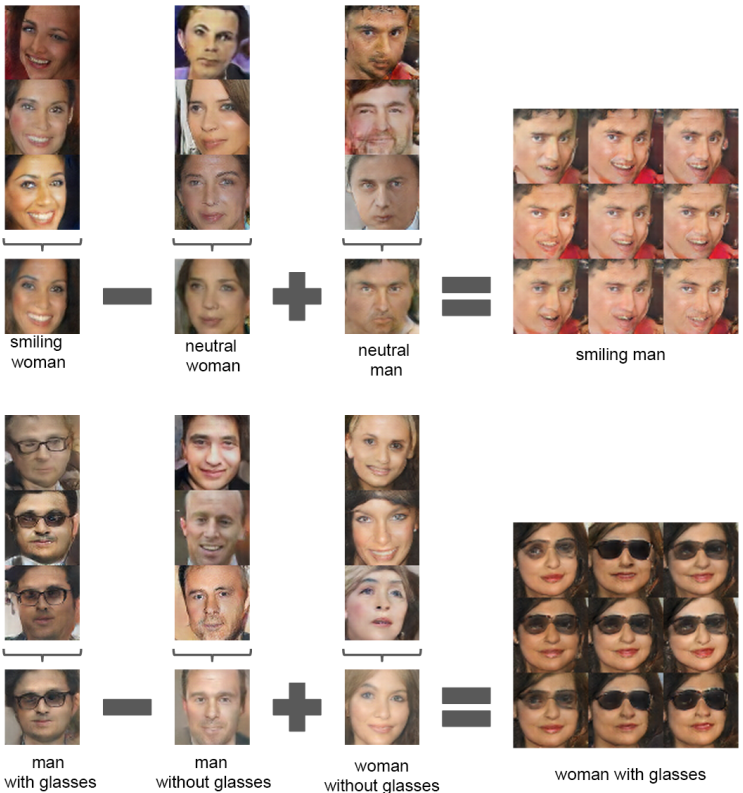

벡터간 간단한 산수를 통해 latent representation space 에서 풍부한 선형구조를 보임  
위 사진은 3개의 샘플에 대하여 평균을 취해 연산을 한 결과

# 코드 실습 CIFAR-10

In [ ]:
# 라이브러리

!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# 변수 선언

z_size = 100
chnl_size = 3
filter_g = 64
filter_d = 64
n_epochs = 200
lr = 0.0002

img_size = 64
batch_size = 128

transforms_train = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

train_dataset = datasets.CIFAR10(root='./dataset', train = True,
                               download = True, transform=transforms_train)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                         shuffle = True, num_workers=4)

# 가중치 초기화 함수
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:         # Conv weight init
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:  # BatchNorm weight init
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:18tcmalloc: large alloc 1147494400 bytes == 0x396b2000 @  0x7fb3bfc73615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:40tcmalloc: large alloc 1434370048 bytes == 0x7dd08000 @  0x7fb3bfc73615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./dataset/cifar-10-python.tar.gz to ./dataset


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# 생성자 정의

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            
            nn.ConvTranspose2d(z_size, filter_g*8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(filter_g*8),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(filter_g*8, filter_g*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(filter_g*4),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(filter_g*4, filter_g*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(filter_g*2),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(filter_g*2, filter_g*1, 4, 2, 1, bias=False),
            nn.BatchNorm2d(filter_g*1),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(filter_g*1, chnl_size, 4, 2, 1, bias=False),
            nn.Tanh()
        )
        
    def forward(self, x):
        img = self.model(x)
        return img


# 판별자 정의

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            
            nn.Conv2d(chnl_size, filter_d, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(filter_d, filter_d*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(filter_d*2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(filter_d*2, filter_d*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(filter_d*4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(filter_d*4, filter_d*8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(filter_d*8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(filter_d*8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        output = self.model(x)
        return output.view(-1,1).squeeze(1)

## Load

In [ ]:
# 모델 학습 및 샘플링
from google.colab import drive
drive.mount('/content/drive')

generator = Generator()
discriminator = Discriminator()

generator.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/코드 실습/generator.pt'))
generator.eval()
discriminator.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/코드 실습/discriminator.pt'))
discriminator.eval()

In [ ]:
# 모델 학습 및 샘플링
#generator = Generator()
#discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

generator.apply(weights_init)
discriminator.apply(weights_init)

# 손실함수 정의
adversarial_loss = nn.BCELoss()
adversarial_loss.cuda()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5,0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5,0.999))

from torch.autograd import Variable

input = torch.cuda.FloatTensor(batch_size, 3, img_size, img_size)
noise = torch.cuda.FloatTensor(batch_size, z_size, 1, 1)
fixed_noise = torch.FloatTensor(batch_size, z_size, 1, 1).normal_(0, 1)
fixed_noise = Variable(fixed_noise)

label = torch.FloatTensor(batch_size)
real_label = 1
fake_label = 0


import time
start_time = time.time()

for epoch in range(50):
  for i, data in enumerate(dataloader):
    discriminator.zero_grad()
    real_cpu, _ = data
    real_imgs = real_cpu.cuda()
    batch_size = real_cpu.size(0)

    input.resize_as_(real_cpu).copy_(real_cpu)
    label.resize_(batch_size).fill_(real_label)
    inputv = Variable(input)
    labelv = Variable(label).cuda()
    d_loss_real = adversarial_loss(discriminator(inputv), labelv)

    noise.resize_(batch_size,z_size,1,1).normal_(0,1)
    noisev = Variable(noise)
    labelv = Variable(label.fill_(fake_label)).cuda()
    d_loss_fake = adversarial_loss(discriminator(generator(noisev)),labelv)
    
    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    optimizer_D.step()

    generator.zero_grad()
    labelv = Variable(label.fill_(real_label)).cuda()
    g_loss = adversarial_loss(discriminator(generator(noisev)),labelv)
    g_loss.backward()
    optimizer_G.step()
  print(f"[Epoch {epoch}/{n_epochs}] [D loss : {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]")


## 결과

In [ ]:
generated_imgs = generator(fixed_noise.cuda())
rows,cols = 8,10
figure = plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
  figure.add_subplot(rows,cols,i)
  plt.imshow(generated_imgs[i-1].cpu().detach().numpy().transpose((1,2,0)))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

torch.save(generator,'/content/drive/MyDrive/Colab Notebooks/generator.pt')
torch.save(discriminator,'/content/drive/MyDrive/Colab Notebooks/discriminator.pt')

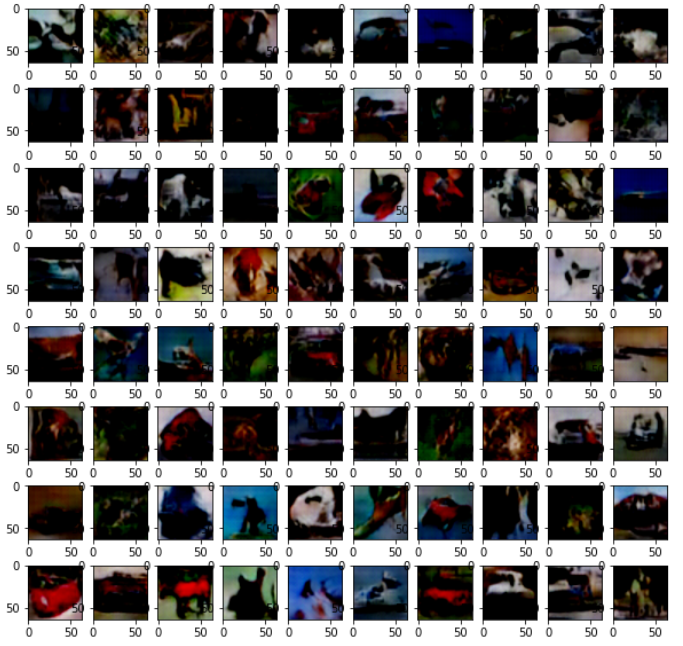